#### Customer Churn Analysis

In [174]:
!pip install imbalanced-learn

###### Import Libraries

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder,StandardScaler

import warnings
warnings.filterwarnings('ignore')

###### Load Dataset

In [285]:
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

###### Dimension of Dataset

In [286]:
df.shape

(7043, 21)

*Observation :*<br>*In this dataset there are 7043 rows and 21 columns*

###### Sample of Dataset

In [287]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###### Breif about Data

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


*Observation :*<br>*In thsi dataset there are 1 float type 2 int type and 18 object type columns*

###### Statistical Summary of Data

###### ---for numerical variable

In [289]:
df.describe(exclude='object')

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


###### ---for Categorical variable

In [290]:
df.describe(include=[object]) 

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,2971-SGAFL,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


*Observation :*<br>*SeniorCitizen have all quartile zero there is missing values*

###### check for unique values in columns

In [291]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

###### check for missing values in columns

In [292]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [293]:
print("Total missing values :",df.isnull().sum().sum())

Total missing values : 0


*Observation :*<br>*NO missing values*

###### check for duplicate rows

In [294]:
sum(df.duplicated())

0

*Observation :*<br>*No duplicate rows*

###### check for zeros in columns

In [295]:
print(df[df==0].count())

customerID             0
gender                 0
SeniorCitizen       5901
Partner                0
Dependents             0
tenure                11
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64


In [296]:
print('Total zeros in Dataset:', df[df==0].count().sum())

Total zeros in Dataset: 5912


###### total % of zeros in columns

In [297]:
print("Total % of Zeros as Value in Columns")
df[df==0].count()/df.shape[0]*100   

Total % of Zeros as Value in Columns


customerID           0.000000
gender               0.000000
SeniorCitizen       83.785319
Partner              0.000000
Dependents           0.000000
tenure               0.156183
PhoneService         0.000000
MultipleLines        0.000000
InternetService      0.000000
OnlineSecurity       0.000000
OnlineBackup         0.000000
DeviceProtection     0.000000
TechSupport          0.000000
StreamingTV          0.000000
StreamingMovies      0.000000
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.000000
Churn                0.000000
dtype: float64

*Observation :*<br>*SeniorCitizen have 83% zero value data and tenure less than 1% zero value data*

###### Identification of variables

###### check for numerical variables

In [298]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  3


In [299]:
for feature in numerical_features:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is SeniorCitizen and number of numerical are 2
The feature is tenure and number of numerical are 73
The feature is MonthlyCharges and number of numerical are 1585


In [300]:
df[numerical_features].head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


###### ---check for descrete variable

In [301]:
descrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Descrete Variables Count: {}".format(len(descrete_feature)),"\n")

for feature in descrete_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))
    
    
for feature in descrete_feature:
    print("\n",feature," : ", df[feature].unique())

Descrete Variables Count: 1 

The feature is SeniorCitizen and number of numerical are 2

 SeniorCitizen  :  [0 1]


In [302]:
df[descrete_feature].head()

,SeniorCitizen
0,0
1,0
2,0
3,0
4,0


###### ---check for countinuous variable

In [303]:
continuous_feature=[feature for feature in numerical_features if feature not in descrete_feature ]
print("Continuous Variables Count {}".format(len(continuous_feature)),"\n")

for feature in continuous_feature:
    print('The feature is:  {}     and number of numerical are:  {}'.format(feature,len(df[feature].unique())))

Continuous Variables Count 2 

The feature is:  tenure     and number of numerical are:  73
The feature is:  MonthlyCharges     and number of numerical are:  1585


In [304]:
df[continuous_feature].head()

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


###### check for categorical variable

In [305]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of Categorical variables: ', len(categorical_features))

Number of Categorical variables:  18


In [306]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is customerID and number of categories are 7043
The feature is gender and number of categories are 2
The feature is Partner and number of categories are 2
The feature is Dependents and number of categories are 2
The feature is PhoneService and number of categories are 2
The feature is MultipleLines and number of categories are 3
The feature is InternetService and number of categories are 3
The feature is OnlineSecurity and number of categories are 3
The feature is OnlineBackup and number of categories are 3
The feature is DeviceProtection and number of categories are 3
The feature is TechSupport and number of categories are 3
The feature is StreamingTV and number of categories are 3
The feature is StreamingMovies and number of categories are 3
The feature is Contract and number of categories are 3
The feature is PaperlessBilling and number of categories are 2
The feature is PaymentMethod and number of categories are 4
The feature is TotalCharges and number of categories are

###### ---check for binary variable

In [307]:
binary_feature=[feature for feature in categorical_features if len(df[feature].unique())==2 or len(df[feature].unique())<2 and feature not in date_feature]
print("Binary Variables Count: {}".format(len(binary_feature)))

Binary Variables Count: 6


In [308]:
for feature in binary_feature:
    print(feature," : ", df[feature].unique())

gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
PaperlessBilling  :  ['Yes' 'No']
Churn  :  ['No' 'Yes']


In [309]:
df[binary_feature].head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,Female,Yes,No,No,Yes,No
1,Male,No,No,Yes,No,No
2,Male,No,No,Yes,Yes,Yes
3,Male,No,No,No,No,No
4,Female,No,No,Yes,Yes,Yes


###### ---check for nominal variable

In [310]:
nominal_feature=[feature for feature in categorical_features if feature not in binary_feature]
print("Nominal feature Count {}".format(len(nominal_feature)))

Nominal feature Count 12


In [311]:
for feature in nominal_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is customerID and number of numerical are 7043
The feature is MultipleLines and number of numerical are 3
The feature is InternetService and number of numerical are 3
The feature is OnlineSecurity and number of numerical are 3
The feature is OnlineBackup and number of numerical are 3
The feature is DeviceProtection and number of numerical are 3
The feature is TechSupport and number of numerical are 3
The feature is StreamingTV and number of numerical are 3
The feature is StreamingMovies and number of numerical are 3
The feature is Contract and number of numerical are 3
The feature is PaymentMethod and number of numerical are 4
The feature is TotalCharges and number of numerical are 6531


In [312]:
#nominalfeature=['Gender','Married','Dependents','Self_Employed','Property_Area']
for feature in nominal_feature :
    print(feature," : ", df[feature].unique())

customerID  :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges  :  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [313]:
df[nominal_feature].head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,TotalCharges
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,1889.5
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,108.15
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),1840.75
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,151.65


###### check for cardinality

###### ---for categorical variables

Text(0.5, 1.0, 'Cardinality')

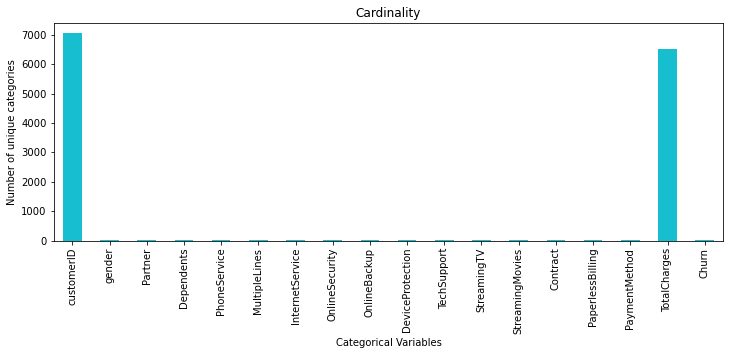

In [314]:
df[categorical_features].nunique().plot.bar(figsize=(12,4),color='#17becf')
plt.ylabel('Number of unique categories')
plt.xlabel('Categorical Variables')
plt.title('Cardinality')

*Observation :*<br>*CustomerID and TotalCharges have high cardinality*

###### check for outliers

###### ---for numerical variables

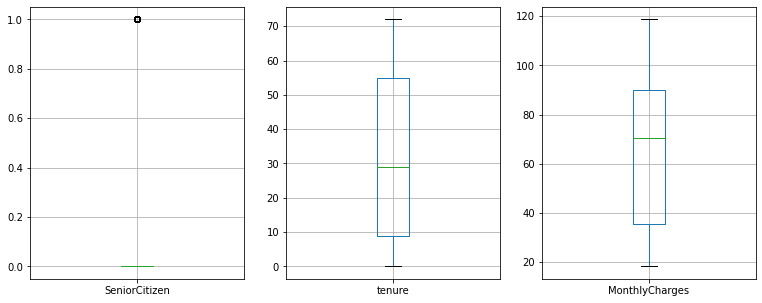

In [315]:
fig, pltcan=plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(13,5))
for predcol , i in zip(numerical_features, range(len(numerical_features))):
    df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

###### check for skewness

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64


<AxesSubplot:>

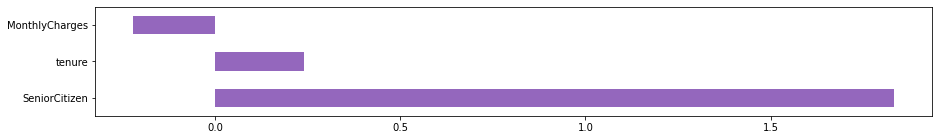

In [316]:
print(df.skew())
df.skew().plot(kind='barh',color='#9467bd',figsize=(15,2))

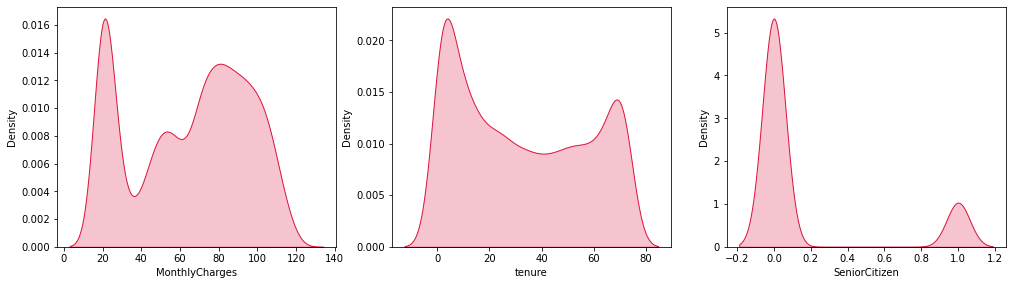

In [317]:
#Visualization of Skewness (numerical variable)
plt.figure(figsize=(17,15))
plt.subplot(3,3,1)
sns.kdeplot(df['MonthlyCharges'],color='crimson',shade=True)
plt.subplot(3,3,2)
sns.kdeplot(df['tenure'],color='crimson',shade=True)
plt.subplot(3,3,3)
sns.kdeplot(df['SeniorCitizen'],color='crimson',shade=True)
plt.show()

*Observation :*<br>*There are skewness in columns*

###### Identify Target and Feature Variable

*Prediction-*<br>*customer churn Prevention*

*Targe Variable (Depaendent Features)* <br>            *-churn* <br>
*Predictors (Independent Features)*<br>                 *- All variables* 

###### Univariate Analysis

###### 1. customerID variable

<AxesSubplot:>

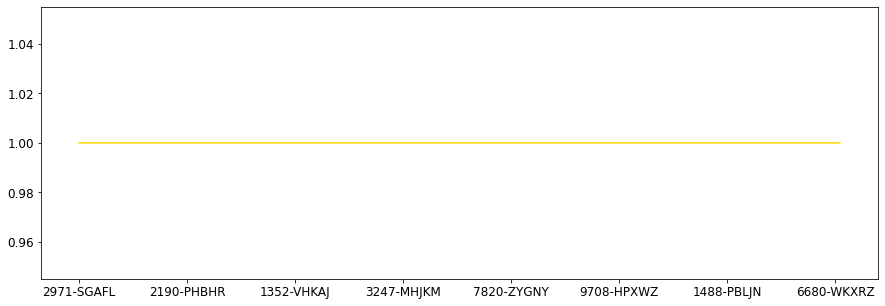

In [319]:
df['customerID'].value_counts().plot(kind = "line",fontsize=12,figsize=(15,5),color='gold')

*Observation :*<br>*equal count*

###### 2. Gender variable

<AxesSubplot:ylabel='gender'>

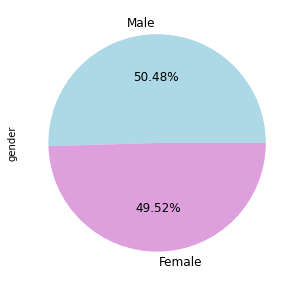

In [320]:
df['gender'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colors = ['lightblue','plum'])

*Observation :*<br>*male 50% and female 49%*

###### 3. SeniorCitizen variable

<AxesSubplot:ylabel='SeniorCitizen'>

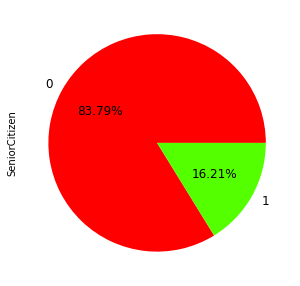

In [321]:
df['SeniorCitizen'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='prism')

*Observation :*<br>*83% is no  and 16 is yes*

###### 4. Partner variable

<AxesSubplot:ylabel='Partner'>

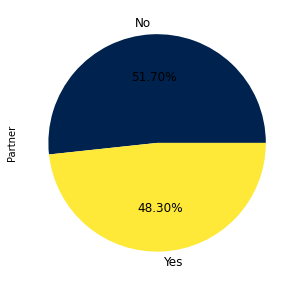

In [322]:
df['Partner'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='cividis')

*Observation :*<br>*51% is No and 48% is Yes*

###### 5. Dependents variable

<AxesSubplot:ylabel='Dependents'>

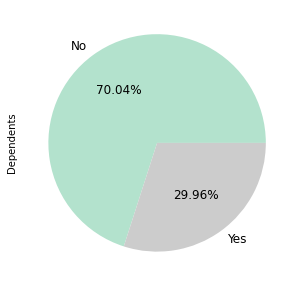

In [323]:
df['Dependents'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='Pastel2')

*Observation :*<br>*70% is No and 29% is Yes*

###### 6. Tenure variable

<AxesSubplot:>

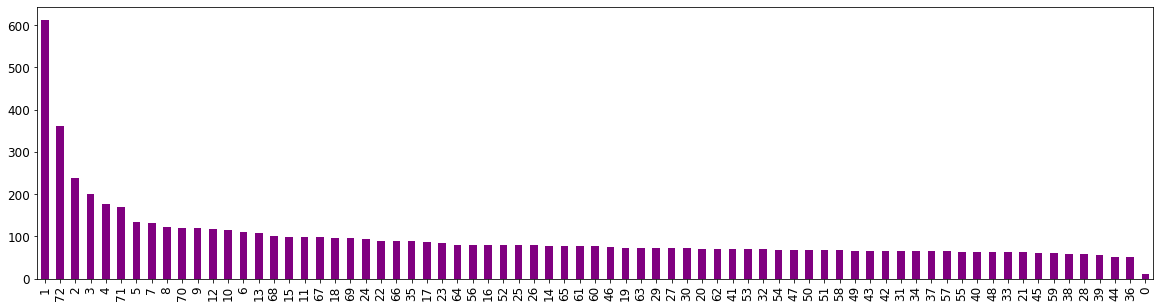

In [324]:
df['tenure'].value_counts().plot(kind = "bar",fontsize=12,figsize=(20,5),color = 'purple')

*Observation :*<br>*1 is the highest and 72,2,3,4,71,5 are 2nd highest and 0 is the least*

###### 7. PhoneService variable

<AxesSubplot:ylabel='PhoneService'>

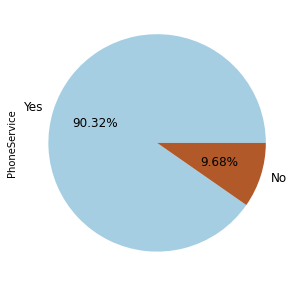

In [325]:
df['PhoneService'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='Paired')

*Observation :*<br>*90% is Yes and 9% is No*

###### 8. MultipleLines variable

<AxesSubplot:ylabel='MultipleLines'>

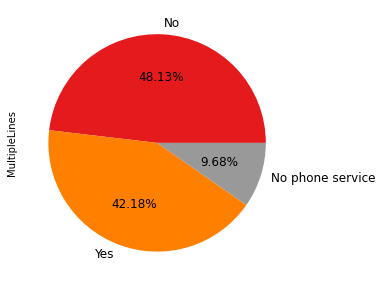

In [326]:
df['MultipleLines'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='Set1')

###### 9. InternetService variable

<AxesSubplot:ylabel='InternetService'>

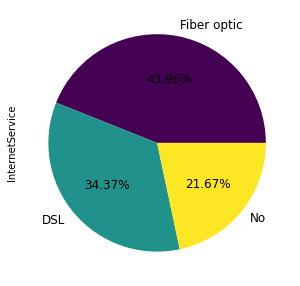

In [327]:
df['InternetService'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='viridis')

*Observation :*<br>*43% fiber,34% DSL and 21% No internet service*

###### 10. OnlineSecurity variable

<AxesSubplot:ylabel='OnlineSecurity'>

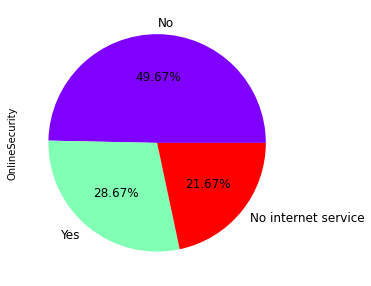

In [328]:
df['OnlineSecurity'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='rainbow')

*Observation :*<br>*21% no internet service,28% online security,49% no online security*

###### 11. OnlineBackup variable

<AxesSubplot:ylabel='OnlineBackup'>

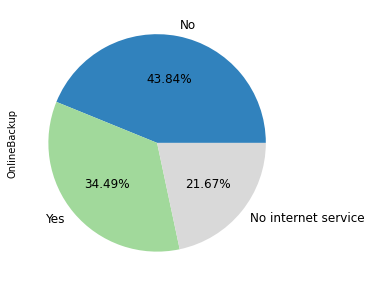

In [329]:
df['OnlineBackup'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='tab20c')

*Observation :*<br>*43% no online backup, 34% online backup, 21% no internet service*

###### 12. DeviceProtection variable

<AxesSubplot:ylabel='DeviceProtection'>

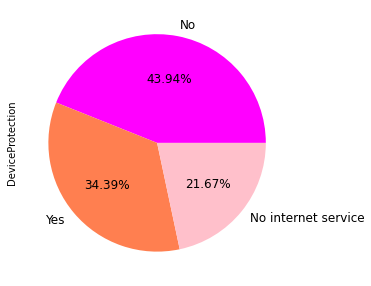

In [330]:
df['DeviceProtection'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colors = ['magenta','coral','pink'])

*Observation :*<br>*Device protection 34%,43% no device protection, 21% no internet service*

###### 13. TechSupport variable

<AxesSubplot:ylabel='TechSupport'>

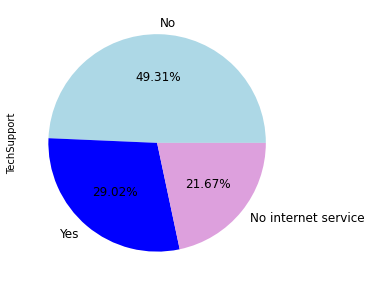

In [331]:
df['TechSupport'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colors = ['lightblue','blue','plum'])

###### 14. StreamingTV variable

<AxesSubplot:ylabel='StreamingTV'>

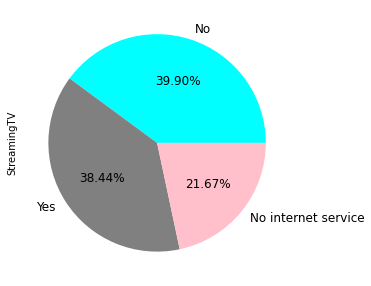

In [332]:
df['StreamingTV'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colors = ['aqua','grey','pink'])

*Observation :*<br>*streamingTV 38%, No StreamingTV 39%, no internet service 21%*

###### 15. StreamingMovies variable

<AxesSubplot:ylabel='StreamingMovies'>

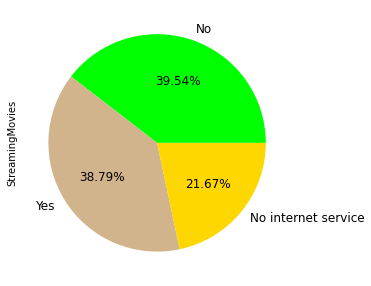

In [333]:
df['StreamingMovies'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colors = ['lime','tan','gold'])

*Observation :*<br>* 38% streamingMOvies, 39% no streamingMOvies, 21% no internet service*

###### 16. Contract variable

<AxesSubplot:ylabel='Contract'>

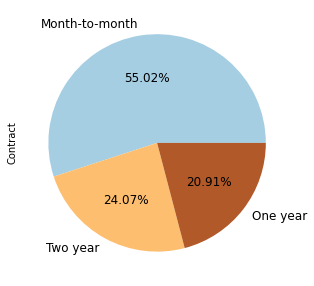

In [334]:
df['Contract'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='Paired')

*Observation :*<br>*contract i year 20%, 2 year 24%, less than 1 year is 55%*

###### 17. PaperlessBilling variable

<AxesSubplot:ylabel='PaperlessBilling'>

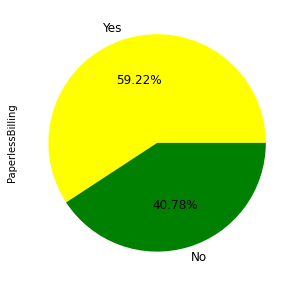

In [335]:
df['PaperlessBilling'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colors = ['yellow','green'])

*Observation :*<br>*59% is yes and 40% is NO*

###### 18. PaymentMethod variable

<AxesSubplot:ylabel='PaymentMethod'>

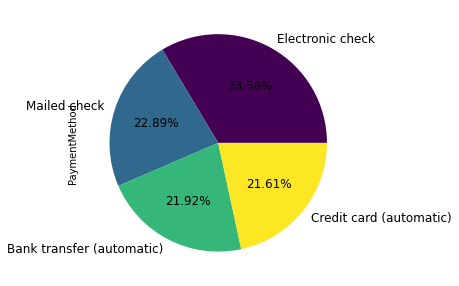

In [336]:
df['PaymentMethod'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='viridis')

*Observation :*<br>*21% bank transfer, 22% mailed check, 33% electronic check, 21% credit card*

###### 19. MonthlyCharges variable

<AxesSubplot:>

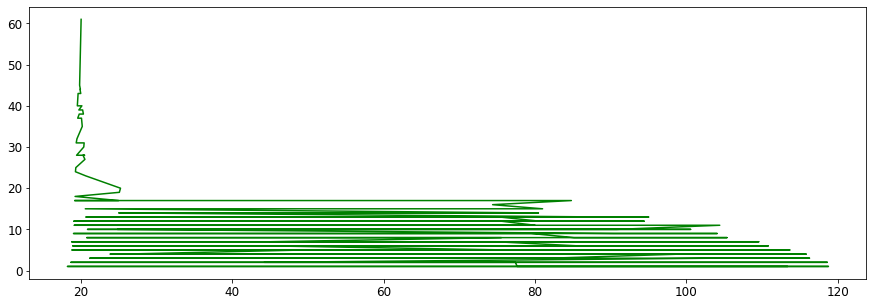

In [337]:
df['MonthlyCharges'].value_counts().plot(kind = "line",fontsize=12,figsize=(15,5),color ='green')

*Observation :*<br>*monthly charges are in the range of 20 to 120. at 20 it is highest*

###### 20. TotalCharges variable

<AxesSubplot:>

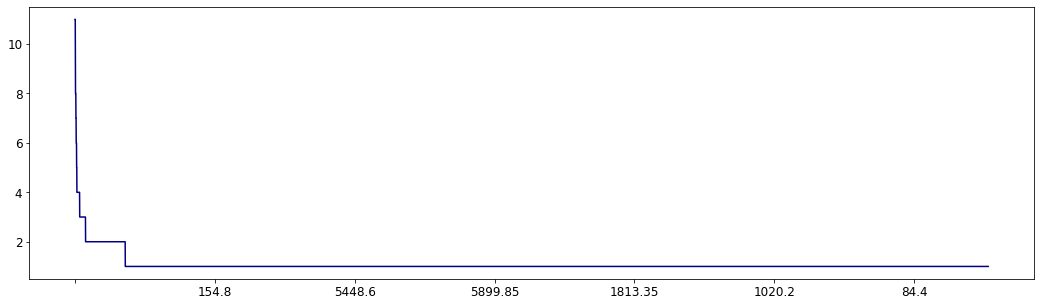

In [338]:
df['TotalCharges'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color ='navy')

*Observation :*<br>*0 to 150 its highest*

###### 21. Churn variable

<AxesSubplot:ylabel='Churn'>

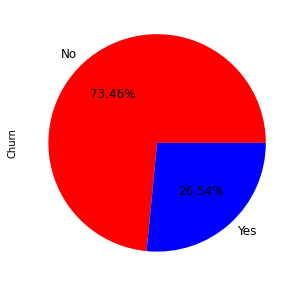

In [339]:
df['Churn'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colors = ['red','blue'])

*Observation :*<br>*73% is No and 26% is Yes*

###### Bivariate Analysis

###### 1 churn 
        Vs customerID
        Vs gender 
        Vs SeniorCitizen
        Vs Partner
        Vs Dependents
        Vs tenure
        Vs PhoneService
        Vs MultipleLines
        Vs InternetService
        Vs OnlineSecurity
        Vs OnlineBackup
        Vs DeviceProtection
        Vs TechSupport
        Vs StreamingTV
        Vs StreamingMovies
        Vs PaperlessBilling
        Vs Contract
        Vs PaymentMethod
        Vs MonthlyCharges
        Vs TotalCharges

In [ ]:
plt.figure(figsize=(17,4))
sns.scatterplot(df['customerID'], df['Churn'], color='green')
plt.title('customerID vs Churn', size=14)
plt.xticks(rotation=90)
plt.show()

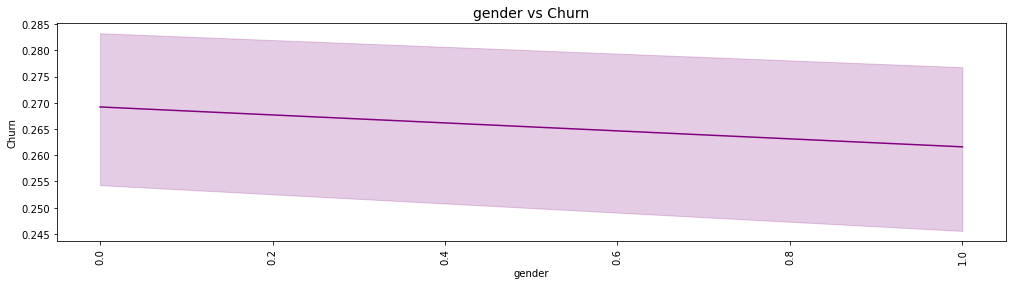

In [282]:
plt.figure(figsize=(17,4))
sns.lineplot(df['gender'], df['Churn'], color='purple')
plt.title('gender vs Churn', size=14)
plt.xticks(rotation=90)
plt.show()


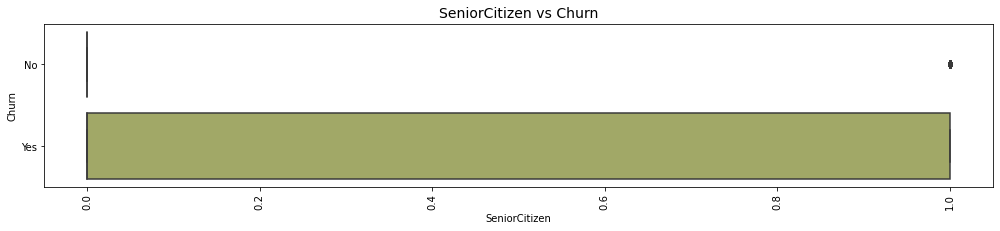

In [121]:
plt.figure(figsize=(17,3))
sns.boxplot(df['SeniorCitizen'], df['Churn'], palette='gist_earth')
plt.title('SeniorCitizen vs Churn', size=14)
plt.xticks(rotation=90)
plt.show()


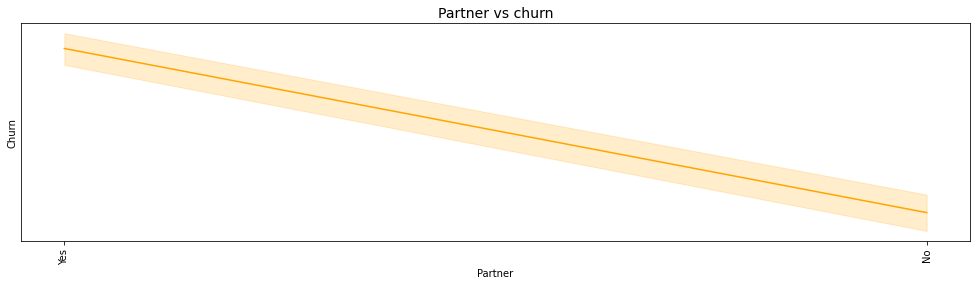

In [125]:
plt.figure(figsize=(17,4))
sns.lineplot(df['Partner'], df['Churn'], color='orange')
plt.title('Partner vs churn', size=14)
plt.xticks(rotation=90)
plt.show()


In [318]:
plt.figure(figsize=(17,4))
sns.lineplot(df['Dependents'], df['Churn'], color='navvy')
plt.title('Dependents vs churn', size=14)
plt.xticks(rotation=90)
plt.show()


ValueError: 'navvy' is neither a valid single color nor a color sequence consisting of single character color specifiers such as 'rgb'. Note also that the latter is deprecated.

ValueError: Invalid RGBA argument: 'navvy'

<Figure size 1224x288 with 1 Axes>

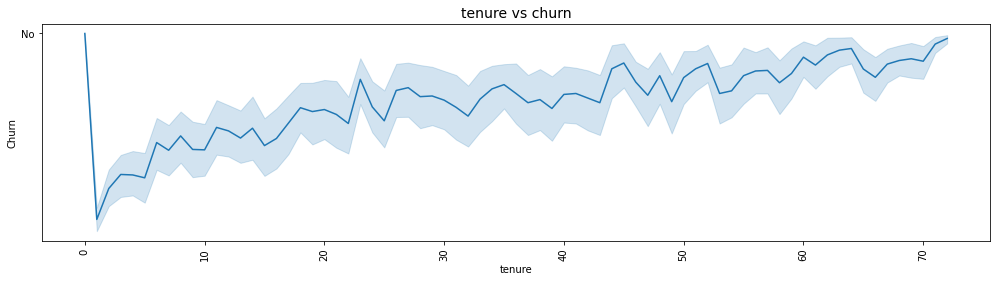

In [134]:
plt.figure(figsize=(17,4))
sns.lineplot(df['tenure'], df['Churn'], palette='gist_earth')
plt.title('tenure vs churn', size=14)
plt.xticks(rotation=90)
plt.show()


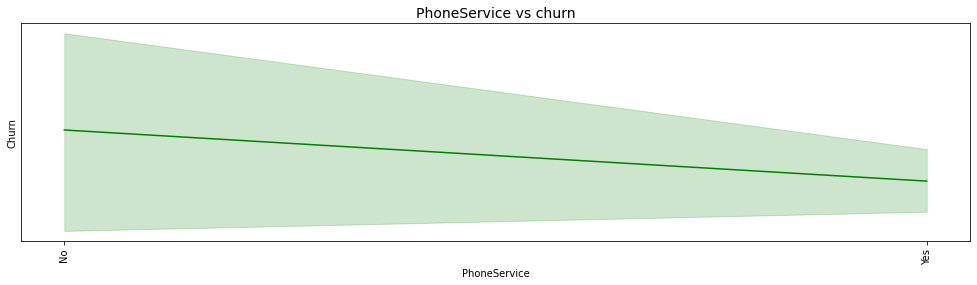

In [138]:
plt.figure(figsize=(17,4))
sns.lineplot(df['PhoneService'], df['Churn'], color='green')
plt.title('PhoneService vs churn', size=14)
plt.xticks(rotation=90)
plt.show()


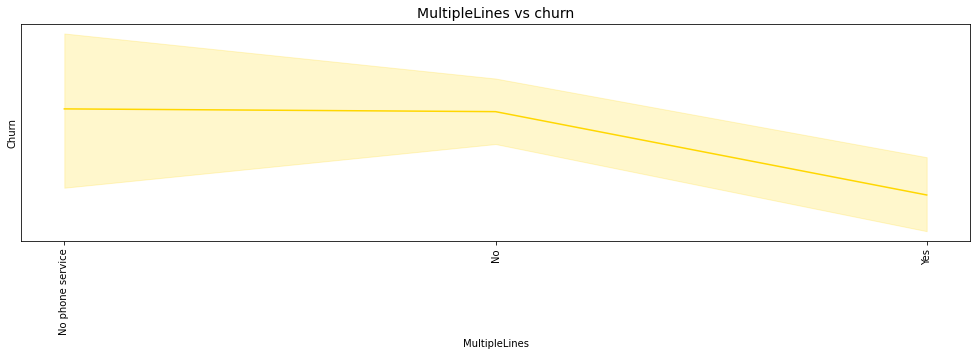

In [141]:
plt.figure(figsize=(17,4))
sns.lineplot(df['MultipleLines'], df['Churn'], color='gold')
plt.title('MultipleLines vs churn', size=14)
plt.xticks(rotation=90)
plt.show()


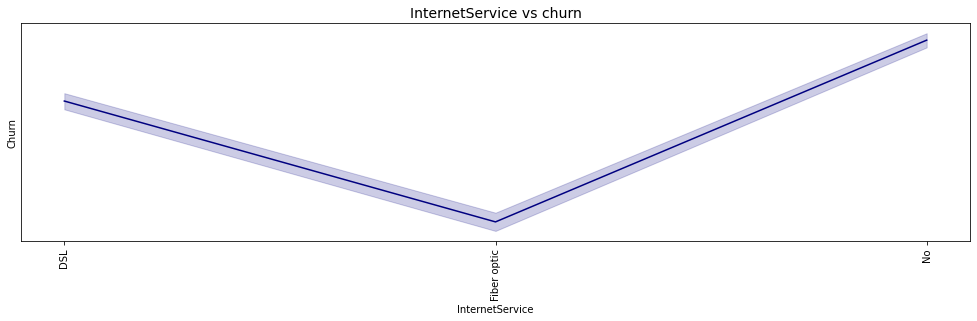

In [145]:
plt.figure(figsize=(17,4))
sns.lineplot(df['InternetService'], df['Churn'], color='navy')
plt.title('InternetService vs churn', size=14)
plt.xticks(rotation=90)
plt.show()


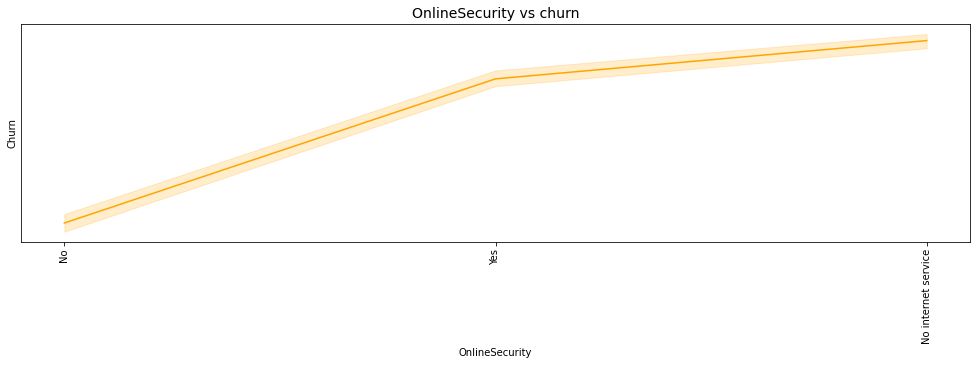

In [147]:
plt.figure(figsize=(17,4))
sns.lineplot(df['OnlineSecurity'], df['Churn'], color='orange')
plt.title('OnlineSecurity vs churn', size=14)
plt.xticks(rotation=90)
plt.show()


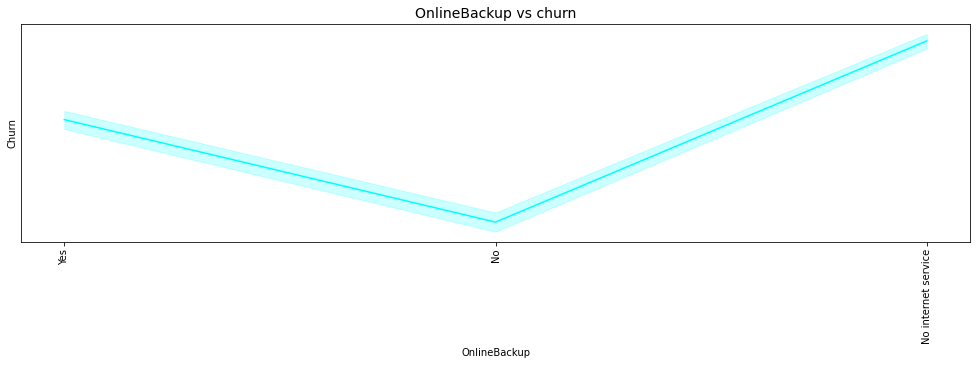

In [149]:
plt.figure(figsize=(17,4))
sns.lineplot(df['OnlineBackup'], df['Churn'], color='aqua')
plt.title('OnlineBackup vs churn', size=14)
plt.xticks(rotation=90)
plt.show()


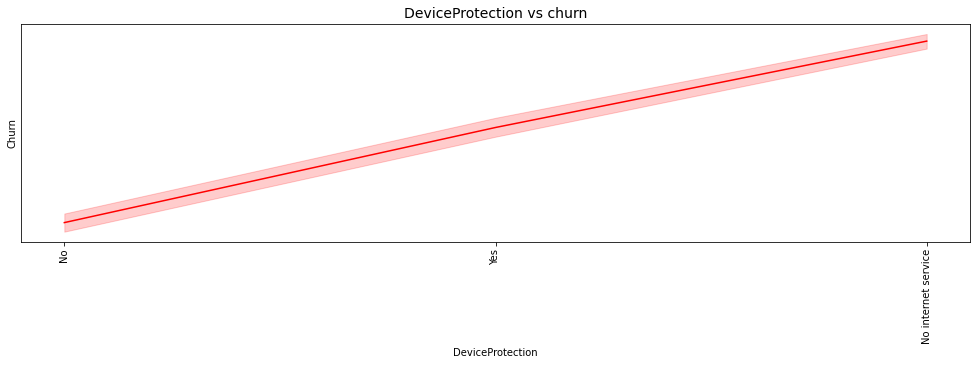

In [151]:
plt.figure(figsize=(17,4))
sns.lineplot(df['DeviceProtection'], df['Churn'], color='red')
plt.title('DeviceProtection vs churn', size=14)
plt.xticks(rotation=90)
plt.show()


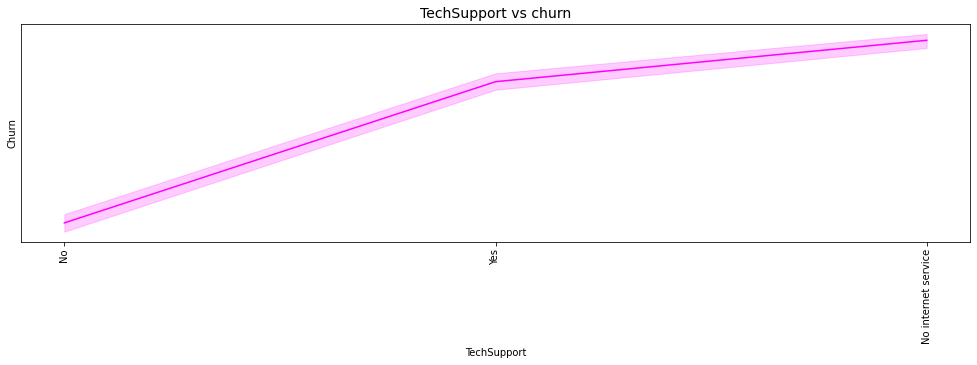

In [153]:
plt.figure(figsize=(17,4))
sns.lineplot(df['TechSupport'], df['Churn'], color='magenta')
plt.title('TechSupport vs churn', size=14)
plt.xticks(rotation=90)
plt.show()


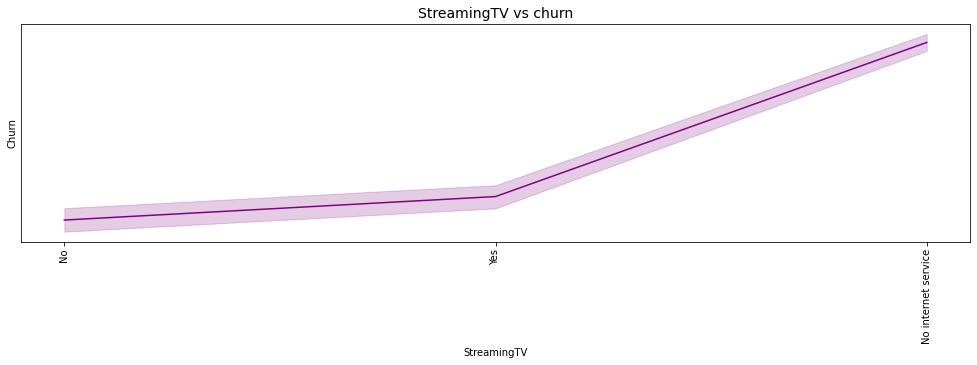

In [155]:
plt.figure(figsize=(17,4))
sns.lineplot(df['StreamingTV'], df['Churn'], color='purple')
plt.title('StreamingTV vs churn', size=14)
plt.xticks(rotation=90)
plt.show()


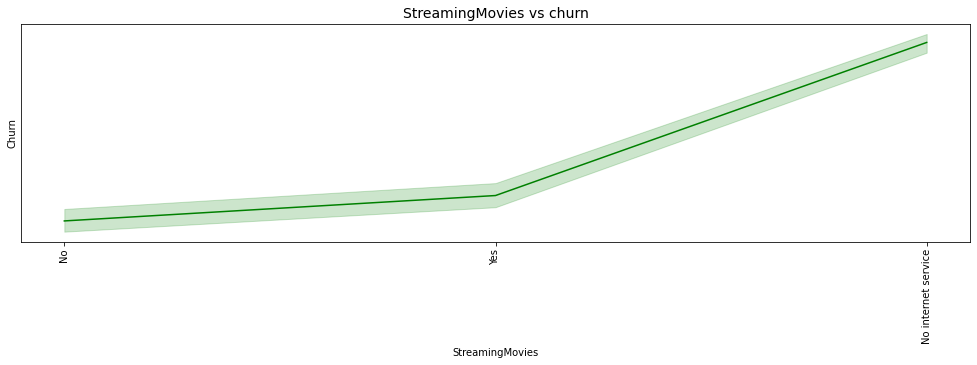

In [156]:
plt.figure(figsize=(17,4))
sns.lineplot(df['StreamingMovies'], df['Churn'], color='green')
plt.title('StreamingMovies vs churn', size=14)
plt.xticks(rotation=90)
plt.show()


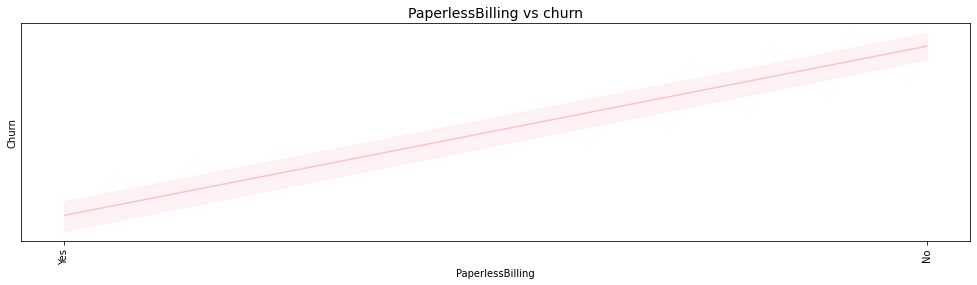

In [157]:
plt.figure(figsize=(17,4))
sns.lineplot(df['PaperlessBilling'], df['Churn'], color='pink')
plt.title('PaperlessBilling vs churn', size=14)
plt.xticks(rotation=90)
plt.show()


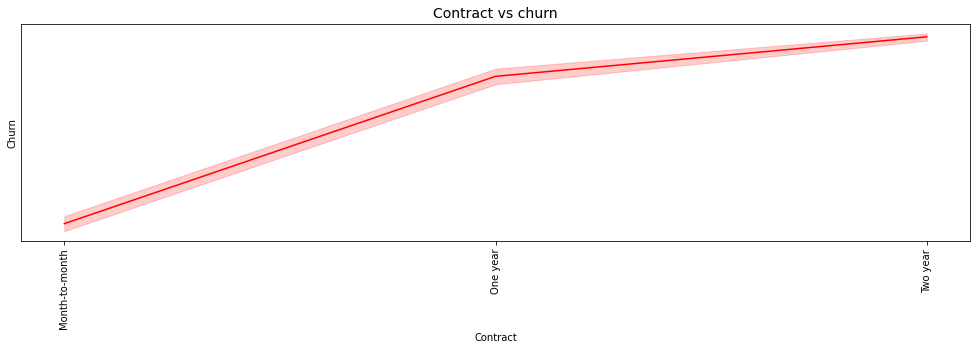

In [158]:
plt.figure(figsize=(17,4))
sns.lineplot(df['Contract'], df['Churn'],  color='red')
plt.title('Contract vs churn', size=14)
plt.xticks(rotation=90)
plt.show()


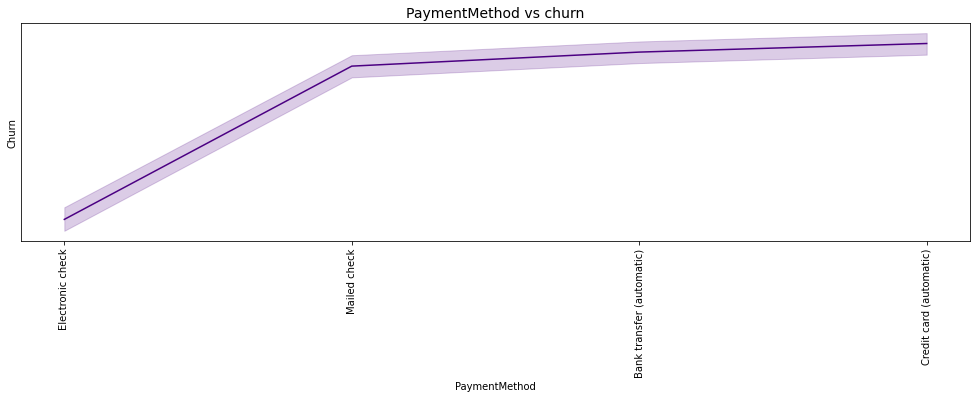

In [159]:
plt.figure(figsize=(17,4))
sns.lineplot(df['PaymentMethod'], df['Churn'],  color='indigo')
plt.title('PaymentMethod vs churn', size=14)
plt.xticks(rotation=90)
plt.show()


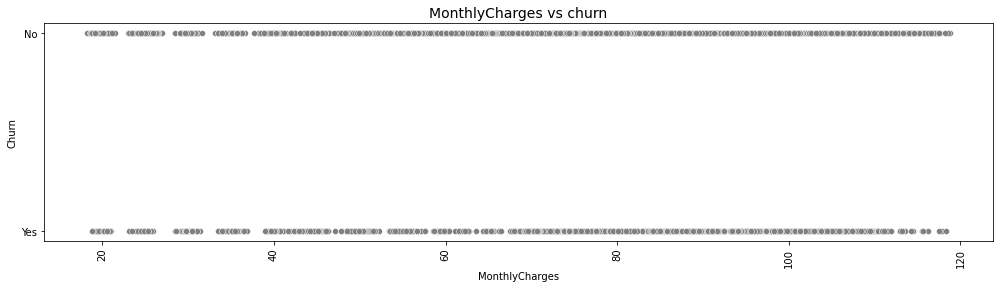

In [166]:
plt.figure(figsize=(17,4))
sns.scatterplot(df['MonthlyCharges'], df['Churn'],  color='grey')
plt.title('MonthlyCharges vs churn', size=14)
plt.xticks(rotation=90)
plt.show()


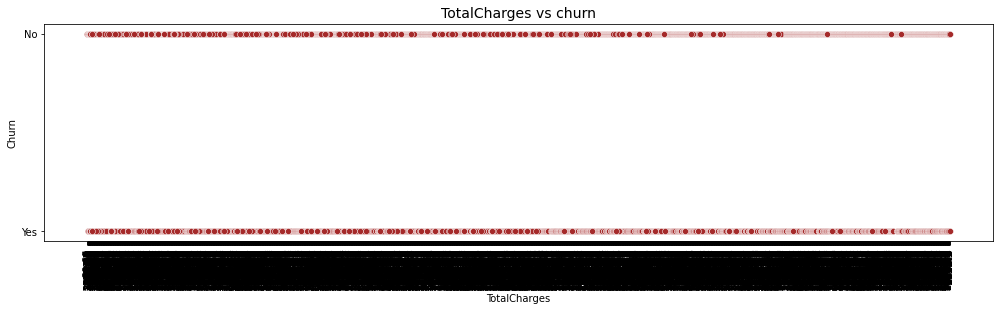

In [165]:
plt.figure(figsize=(17,4))
sns.scatterplot(df['TotalCharges'], df['Churn'],  color='brown')
plt.title('TotalCharges vs churn', size=14)
plt.xticks(rotation=90)
plt.show()


###### Multivariate Analysis

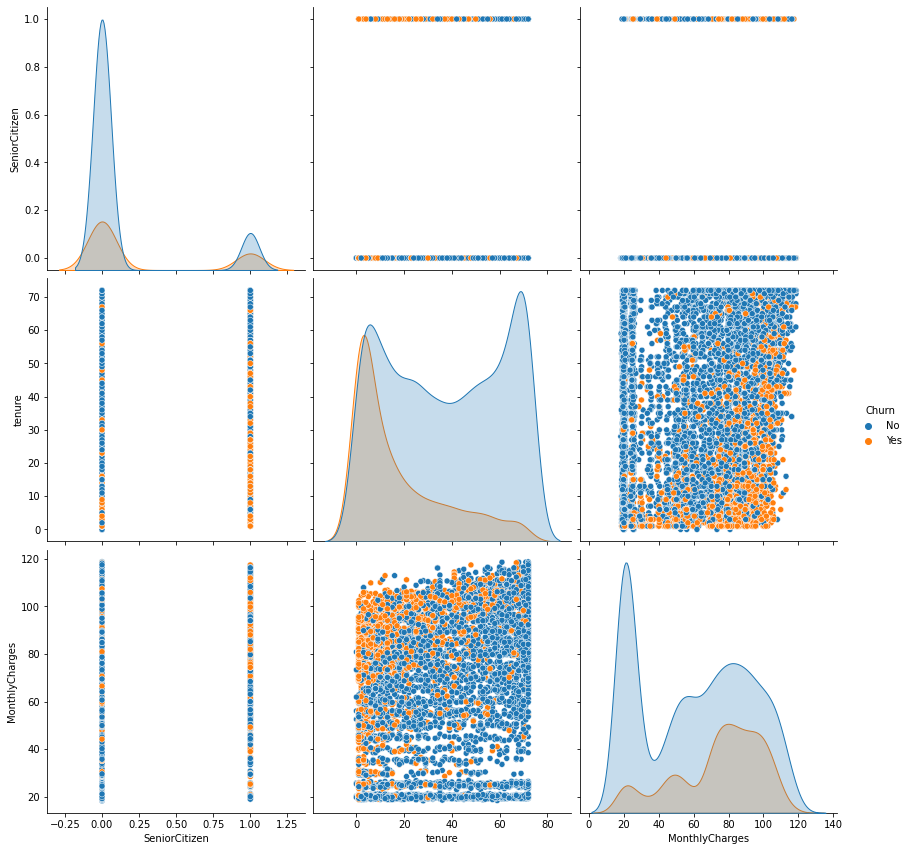

In [163]:
sns.pairplot(df,hue='Churn',height=4)

###### Handling Outliers

In [224]:
fout =['tenure','MonthlyCharges']
for f in fout:
    q1 = df[f].quantile(0.25)
    q3 = df[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    df.loc[df[f]<lolimit,f] = lolimit
    df.loc[df[f]>uplimit,f] = uplimit

In [225]:
#Recheck for Outliers After Removing

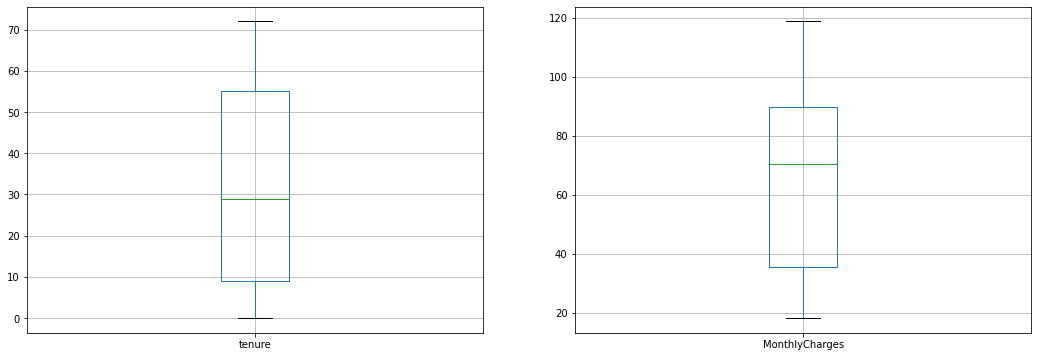

In [226]:
col1=['tenure','MonthlyCharges']
fig, pltcan=plt.subplots(nrows=1, ncols=len(col1), figsize=(18,6))
for predcol , i in zip(col1, range(len(col1))):
    df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

In [227]:
df.shape

(7043, 21)

###### Handling Missing/Zeros Values

No missing values
<br>and zeros are categories so no need to remove

###### Encoding categorical variables

In [228]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [229]:
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['Partner']=le.fit_transform(df['Partner'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['PhoneService']=le.fit_transform(df['PhoneService'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['Churn']=le.fit_transform(df['Churn'])
df['Contract']=le.fit_transform(df['Contract'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])
df['InternetService']=le.fit_transform(df['InternetService'])
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['MultipleLines']=le.fit_transform(df['MultipleLines'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])

df['customerID']=le.fit_transform(df['customerID'])

df[['Total_Charges','TotalCharges2']]=df['TotalCharges'].str.split('.',expand=True)
df['Total_Charges']=le.fit_transform(df['Total_Charges'])
df.drop(['TotalCharges','TotalCharges2'],inplace=True,axis=1)

In [230]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Total_Charges
0,5375,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0,1346
1,3962,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0,751
2,2564,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1,73
3,5535,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0,711
4,6511,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1,458


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


###### Feature Selection

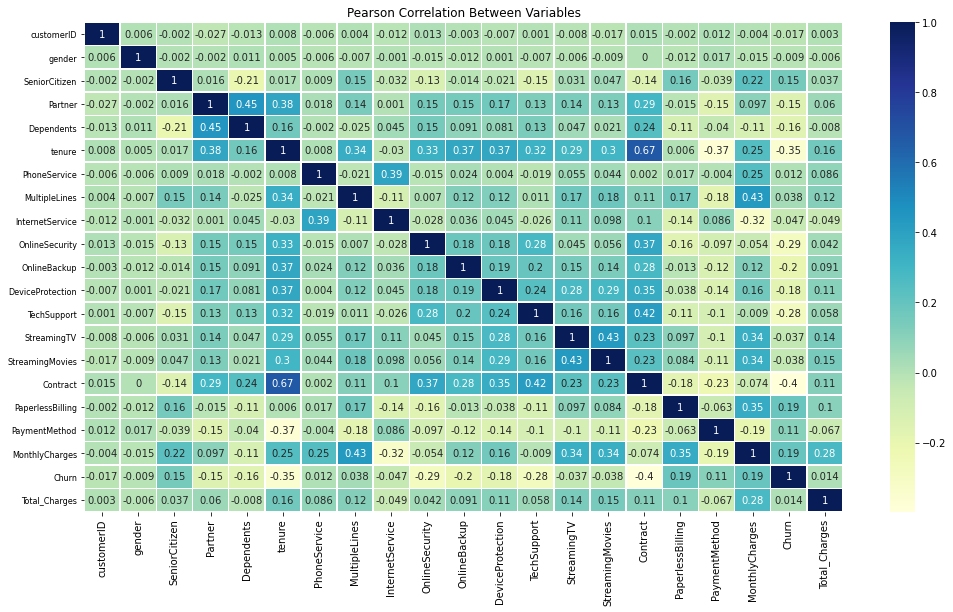

In [232]:
# Variable Correlation
pcorrel = df.corr(method='pearson').round(3)
plt.figure(figsize=(17,9)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()     

*Observation :*<br>*gender,customerID,TotalCharges,PhoneService,MultipleLines,InternetService,StreamingTV,StreamingMovies
    columns are less correlated to churn column*

In [233]:
# Anova Test 
from scipy import stats
from scipy.stats import f_oneway
cr=[]
ncr=[]
for i in df.columns:
    cg=df.groupby(['Churn'])[i].apply(list)
    av=stats.f_oneway(*cg)
    if av[1]<0.5:
        print(i,'------correlated------:',av[1],'\n')
        cr.append(i)
    else:
        print(i,'------not correlated-----:',av[1],'\n')
        ncr.append(i)


customerID ------correlated------: 0.1431757544110872 

gender ------correlated------: 0.4699045390966534 

SeniorCitizen ------correlated------: 3.839860055795412e-37 

Partner ------correlated------: 6.220731129635033e-37 

Dependents ------correlated------: 9.140432989108222e-44 

tenure ------correlated------: 7.999057960610892e-205 

PhoneService ------correlated------: 0.31631478134436675 

MultipleLines ------correlated------: 0.0014092859107975187 

InternetService ------correlated------: 7.177244684485242e-05 

OnlineSecurity ------correlated------: 7.417493145232617e-136 

OnlineBackup ------correlated------: 1.223403969416002e-61 

DeviceProtection ------correlated------: 2.6512652595951677e-51 

TechSupport ------correlated------: 2.351115425218194e-129 

StreamingTV ------correlated------: 0.002137334856867106 

StreamingMovies ------correlated------: 0.0012338348627355608 

Contract ------correlated------: 3.6666750628804027e-264 

PaperlessBilling ------correlated------:

###### split target and feature variables

In [234]:
y_train=df[['Churn']]
X_train=df.drop(['Churn'],axis=1)

print("y_train :",y_train.shape)
print("X_train :",X_train.shape)

y_train : (7043, 1)
X_train : (7043, 20)


<AxesSubplot:>

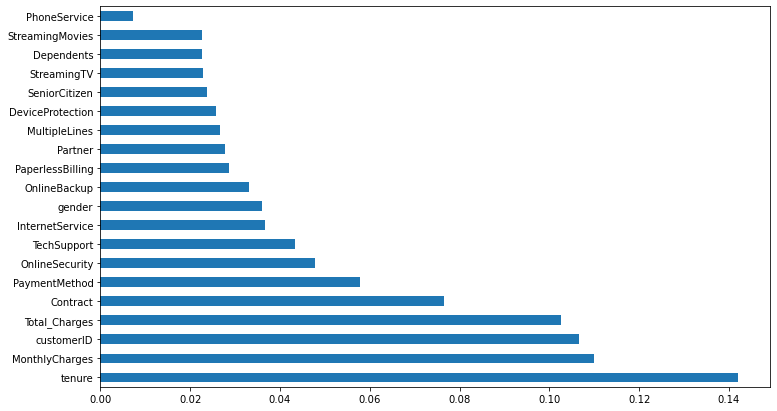

In [235]:
from sklearn.ensemble import ExtraTreesClassifier
etr_model = ExtraTreesClassifier()
etr_model.fit(X_train,y_train)
etr_model.feature_importances_

feature_imp = pd.Series(etr_model.feature_importances_,index=X_train.columns)
feature_imp.nlargest(20).plot(kind='barh',figsize=(12,7))

In [236]:
X_train.drop(['PhoneService','Dependents','StreamingTV','StreamingMovies',
              'SeniorCitizen','MultipleLines','Partner','DeviceProtection'],inplace=True,axis=1)

In [237]:
#Selected columns

In [238]:
X_train.columns

Index(['customerID', 'gender', 'tenure', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Total_Charges'],
      dtype='object')

In [239]:
y_train.columns

Index(['Churn'], dtype='object')

###### Target Variable is Unbalanced

In [240]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

<AxesSubplot:ylabel='None'>

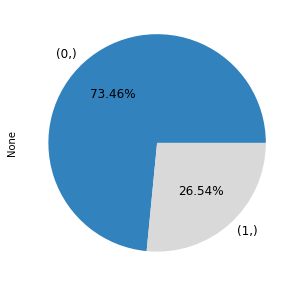

In [241]:
y_train.value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='tab20c')

In [242]:
#balance Target variable

In [243]:
# define dataset
X_train, y_train = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train, y_train)
  
# print the features and the labels
print('x_smote:\n', x_smote.shape)
print('y_smote:\n', y_smote.shape)

x_smote:
 (19800, 20)
y_smote:
 (19800,)


###### Normilization of data

In [244]:
from sklearn.preprocessing import power_transform
X=power_transform(x_smote,method='yeo-johnson')
X

array([[ 1.46990556,  0.53248014,  0.68669166, ...,  0.95828345,
        -0.23841192,  1.47131072],
       [-0.31462354, -1.03374871,  1.48490733, ...,  1.02073499,
         1.99702013,  0.50023204],
       [ 0.97126783,  1.25858026,  1.62564548, ..., -1.86135209,
         0.67841517,  2.08124541],
       ...,
       [-0.15893265,  0.30796342, -1.31848797, ..., -0.45852857,
        -0.46065099,  0.78903461],
       [ 1.85719355, -0.17551816,  0.59525841, ...,  0.97817555,
        -0.482454  , -0.0922357 ],
       [ 1.47393738, -1.26897304, -1.40726606, ...,  0.94126603,
         0.08918722,  0.71918964]])

###### dividing the dataset in training and testing set

In [245]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y_smote, test_size = 0.25, random_state = 440)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14850, 20)
(14850,)
(4950, 20)
(4950,)


###### Sandardization of data

In [246]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
print(x_train)
x_test = sc.fit_transform(x_test)
print(x_test)

[[ 0.97026076 -1.62077608  1.50735034 ...  0.42852106  0.59101211
   0.91868902]
 [ 0.2305212  -0.75200583  1.04180911 ... -1.02781172  0.47341764
   0.33637268]
 [-1.94630355  1.1377871   0.81543248 ... -0.34868838 -1.20800674
  -0.95457071]
 ...
 [ 0.41404402  0.92649455 -0.39688774 ... -1.42563484 -0.43104097
   0.77996558]
 [ 0.46524893  0.28045916 -1.20347039 ...  0.77762335 -0.25362194
  -0.04468957]
 [ 0.07018244 -0.15031707 -1.586469   ...  1.56181666  0.97495539
  -0.65826853]]
[[ 0.35159114  0.11094995 -0.47657271 ...  0.53684198 -0.14349021
  -0.12036141]
 [ 0.3755418  -2.42923905 -1.06775275 ... -2.09765353  0.71371311
  -2.17191859]
 [-0.45628928  0.24147506 -1.80740342 ... -0.45595507  0.09143595
  -0.47006766]
 ...
 [ 0.90657379 -0.29113323  1.17326795 ... -1.1135292  -0.30304136
  -0.6314596 ]
 [ 0.22458264 -0.39781872  0.86758063 ...  0.12322522  0.72253742
  -0.22253624]
 [ 0.36957689  0.58497965 -1.21515661 ... -0.00959687 -0.11496195
   0.15060718]]


###### Modeling Building

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve,auc, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

from sklearn.metrics import precision_score, recall_score, precision_recall_fscore_support
from sklearn.metrics import f1_score,precision_recall_curve



from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve,auc, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

from sklearn.metrics import precision_score, recall_score, precision_recall_fscore_support
from sklearn.metrics import f1_score,precision_recall_curve



In [248]:
models=[]
models1 = []

Z = [DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,
    RandomForestClassifier() , GradientBoostingClassifier(),AdaBoostClassifier()] 
X = ["DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" ,
    "RandomForestClassifier" , "GradientBoostingClassifier","AdaBoostClassifier"]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    models.append(accuracy_score(pred , y_test))
    models1.append(model.score(x_train , y_train))

In [249]:
d = {"Training Accuracy":models1,"Testing Accuracy" : models}
data_frame1 = pd.DataFrame(d,index=X)
data_frame1

,Training Accuracy,Testing Accuracy
DecisionTreeClassifier,1.000000,0.973737
LogisticRegression,0.913670,0.918182
KNeighborsClassifier,0.966667,0.959798
RandomForestClassifier,1.000000,0.990101
GradientBoostingClassifier,0.973199,0.965253
AdaBoostClassifier,0.949966,0.947879


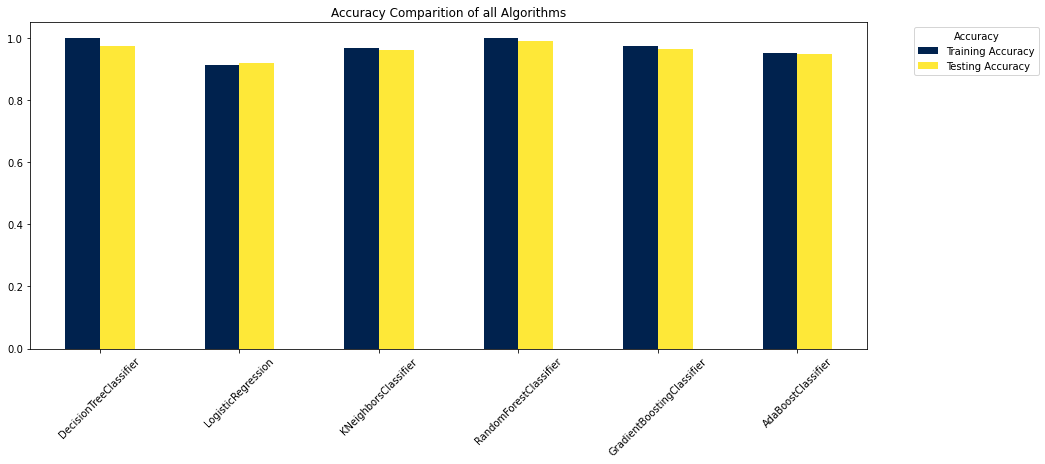

In [251]:
data_frame1.plot(kind='bar',figsize=(15,6),title='Accuracy Comparition of all Algorithms',colormap='cividis')
plt.xticks(rotation=45)
plt.legend(title = 'Accuracy',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

###### Evaluation

###### Classification Report

In [252]:
models2=[]
models3=[]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    Class_Report=metrics.classification_report(y_test, pred)
    models2.append(Class_Report)
    print("Model Name :",model,"\n",Class_Report)
    f1sc=metrics.f1_score(y_test, pred, average='weighted')
    models3.append(f1sc)
    print("Testing Accuracy of Data with Model",model,":",round(f1sc,2),"\n")

Model Name : DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      2458
           1       0.97      0.98      0.97      2492

    accuracy                           0.97      4950
   macro avg       0.97      0.97      0.97      4950
weighted avg       0.97      0.97      0.97      4950

Testing Accuracy of Data with Model DecisionTreeClassifier() : 0.97 

Model Name : LogisticRegression() 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      2458
           1       0.91      0.93      0.92      2492

    accuracy                           0.92      4950
   macro avg       0.92      0.92      0.92      4950
weighted avg       0.92      0.92      0.92      4950

Testing Accuracy of Data with Model LogisticRegression() : 0.92 

Model Name : KNeighborsClassifier() 
               precision    recall  f1-score   support

           0       1.00      0.92      0.

In [253]:
d2 = {"Accuracy of Testing Data" : models3}
data_frame2 = pd.DataFrame(d2,index=X)
data_frame2

,Accuracy of Testing Data
DecisionTreeClassifier,0.972725
LogisticRegression,0.918173
KNeighborsClassifier,0.959722
RandomForestClassifier,0.989695
GradientBoostingClassifier,0.965030
AdaBoostClassifier,0.947874


In [254]:
df4=pd.concat([data_frame1,data_frame2],axis=1)
df4

,Training Accuracy,Testing Accuracy,Accuracy of Testing Data
DecisionTreeClassifier,1.000000,0.973737,0.972725
LogisticRegression,0.913670,0.918182,0.918173
KNeighborsClassifier,0.966667,0.959798,0.959722
RandomForestClassifier,1.000000,0.990101,0.989695
GradientBoostingClassifier,0.973199,0.965253,0.965030
AdaBoostClassifier,0.949966,0.947879,0.947874


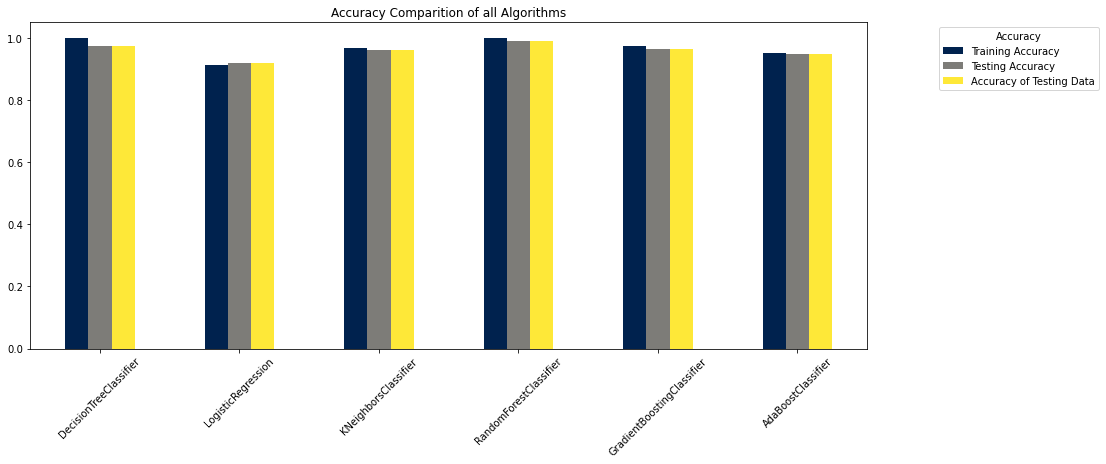

In [255]:
df4.plot(kind='bar',figsize=(15,6),title='Accuracy Comparition of all Algorithms',colormap='cividis')
plt.xticks(rotation=45)
plt.legend(title = 'Accuracy',bbox_to_anchor=(1.08, 1), loc='upper left')
plt.show()

###### Confusion Matrix

In [256]:
cmodel=[]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    cm = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
    cmodel.append(cm)
    

dc={"Confusion Matrix":cmodel}    
conf_mat=pd.DataFrame(dc,index=X)

conf_mat

,Confusion Matrix
DecisionTreeClassifier,"[[2441, 51], [86, 2372]]"
LogisticRegression,"[[2308, 184], [221, 2237]]"
KNeighborsClassifier,"[[2492, 0], [199, 2259]]"
RandomForestClassifier,"[[2492, 0], [47, 2411]]"
GradientBoostingClassifier,"[[2458, 34], [138, 2320]]"
AdaBoostClassifier,"[[2379, 113], [145, 2313]]"


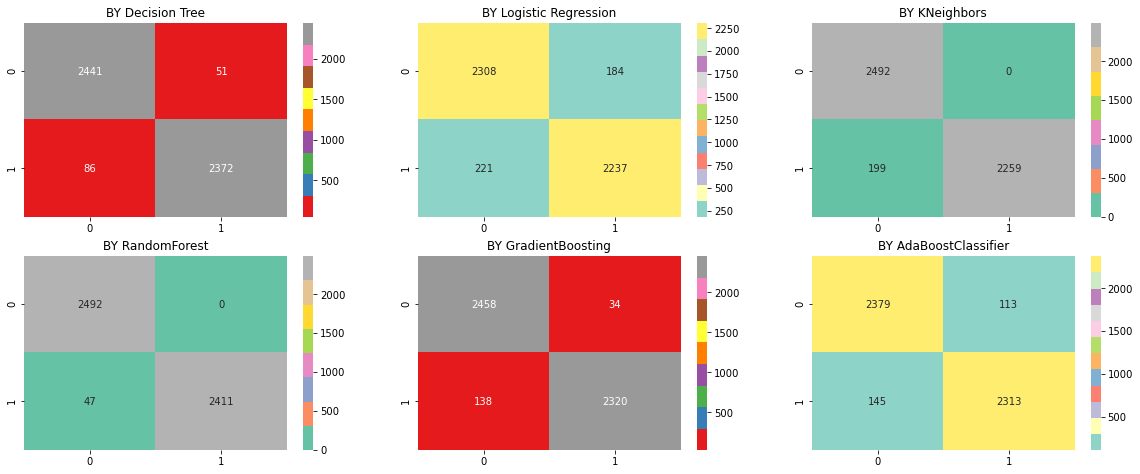

In [257]:
plt.figure(figsize=(20,25))
plt.subplot(6,3,1)
sns.heatmap(cmodel[0],annot=True,fmt='g',cmap='Set1')
plt.title("BY Decision Tree")
plt.subplot(6,3,2)
sns.heatmap(cmodel[1],annot=True,fmt='g',cmap='Set3')
plt.title("BY Logistic Regression")
plt.subplot(6,3,3)
sns.heatmap(cmodel[2],annot=True,fmt='g',cmap='Set2')
plt.title("BY KNeighbors")  
plt.subplot(6,3,4)
sns.heatmap(cmodel[3],annot=True,fmt='g',cmap='Set2')
plt.title("BY RandomForest")
plt.subplot(6,3,5)
sns.heatmap(cmodel[4],annot=True,fmt='g',cmap='Set1')
plt.title("BY GradientBoosting")
plt.subplot(6,3,6)
sns.heatmap(cmodel[5],annot=True,fmt='g',cmap='Set3')
plt.title("BY AdaBoostClassifier")
plt.show()   


###### Validation

In [258]:
vmodel=[]
acvalmodel=[]
for i in range(0,len(Z)):
    model = Z[i]
    model.fit( x_train , y_train )
    pred = model.predict(x_test)
    acval=cross_val_score(model,x_train , y_train, cv=10, scoring='f1_weighted')
    acvalmodel.append(acval)
    print('\n',model,' 10-fold Cross Validation:')
    print('Accuracy value :',acval)
    vmodel.append(round(acval.mean(),2))
    print('Final Average Accuracy :',round(acval.mean(),3))


 DecisionTreeClassifier()  10-fold Cross Validation:
Accuracy value : [0.97508248 0.9764288  0.97440764 0.9750799  0.97912458 0.97103655
 0.97171579 0.97642606 0.97575203 0.97440836]
Final Average Accuracy : 0.975

 LogisticRegression()  10-fold Cross Validation:
Accuracy value : [0.91580583 0.91512673 0.91715105 0.91245077 0.91042674 0.90772486
 0.91648544 0.91312194 0.91110676 0.9050307 ]
Final Average Accuracy : 0.912

 KNeighborsClassifier()  10-fold Cross Validation:
Accuracy value : [0.95208675 0.96021188 0.95479426 0.94869248 0.95750292 0.94325929
 0.95479426 0.94121937 0.9541168  0.9527615 ]
Final Average Accuracy : 0.952

 RandomForestClassifier()  10-fold Cross Validation:
Accuracy value : [0.99191888 0.98855113 0.98922457 0.99057173 0.9925923  0.9919188
 0.9878773  0.99124528 0.98720362 0.98855125]
Final Average Accuracy : 0.99

 GradientBoostingClassifier()  10-fold Cross Validation:
Accuracy value : [0.96428829 0.96429672 0.96564304 0.96226681 0.9683458  0.96159892
 0.960

In [259]:
dv={"10 fold Cross Validation":acvalmodel,"Final Average Accuracy":vmodel}    
cross_val=pd.DataFrame(dv,index=X)
cross_val

,10 fold Cross Validation,Final Average Accuracy
DecisionTreeClassifier,"[0.9750824802261795, 0.976428795975561, 0.9744...",0.97
LogisticRegression,"[0.9158058269892542, 0.9151267305897243, 0.917...",0.91
KNeighborsClassifier,"[0.9520867540149923, 0.9602118834038605, 0.954...",0.95
RandomForestClassifier,"[0.9919188841034536, 0.9885511294738438, 0.989...",0.99
GradientBoostingClassifier,"[0.9642882925443499, 0.9642967156862289, 0.965...",0.96
AdaBoostClassifier,"[0.9488161177769061, 0.9380405636246758, 0.946...",0.94


In [260]:
#visualization of final Accuracy

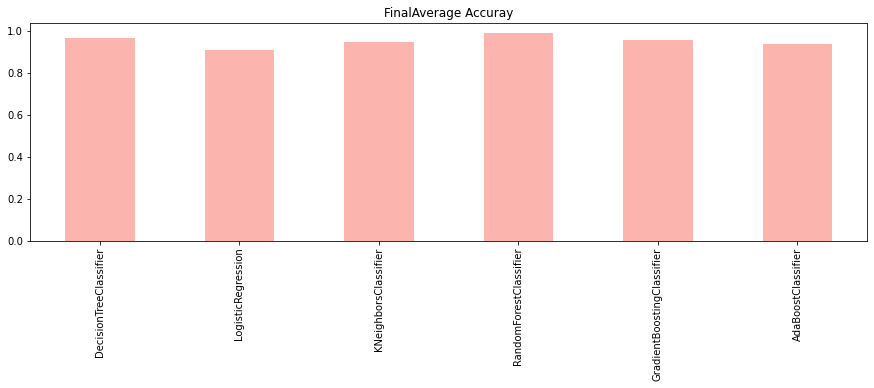

In [261]:
#cross_val['Final Average Accuracy'].plot(kind='bar')
cross_val['Final Average Accuracy'].plot(kind='bar',figsize=(15,4),title='FinalAverage Accuray',colormap='Pastel1')
plt.show()

In [262]:
#AUC_ROC Curve

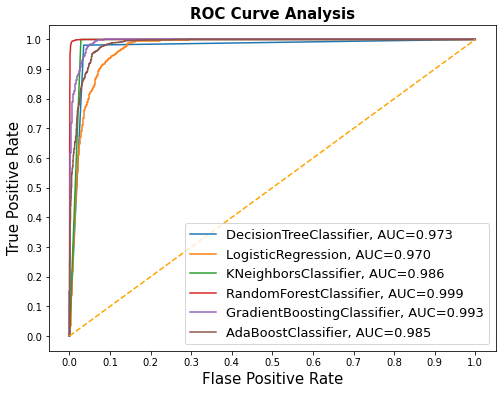

In [263]:
result_table = pd.DataFrame(columns=['Z', 'fpr','tpr','auc'])
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    ypred = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  ypred)
    auc = roc_auc_score(y_test, ypred)
    result_table = result_table.append({'model':model.__class__.__name__,'fpr':fpr,'tpr':tpr,'auc':auc},ignore_index=True)
result_table.set_index('model', inplace=True)

fig = plt.figure(figsize=(8,6))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],result_table.loc[i]['tpr'],label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

###### Model Comparision

In [264]:
dfcomp=pd.concat([data_frame1,cross_val],axis=1)
dfcomp[['Training Accuracy','Testing Accuracy','Final Average Accuracy']].head(6)

,Training Accuracy,Testing Accuracy,Final Average Accuracy
DecisionTreeClassifier,1.000000,0.973737,0.97
LogisticRegression,0.913670,0.918182,0.91
KNeighborsClassifier,0.966667,0.959798,0.95
RandomForestClassifier,1.000000,0.990101,0.99
GradientBoostingClassifier,0.973199,0.965253,0.96
AdaBoostClassifier,0.949966,0.947879,0.94


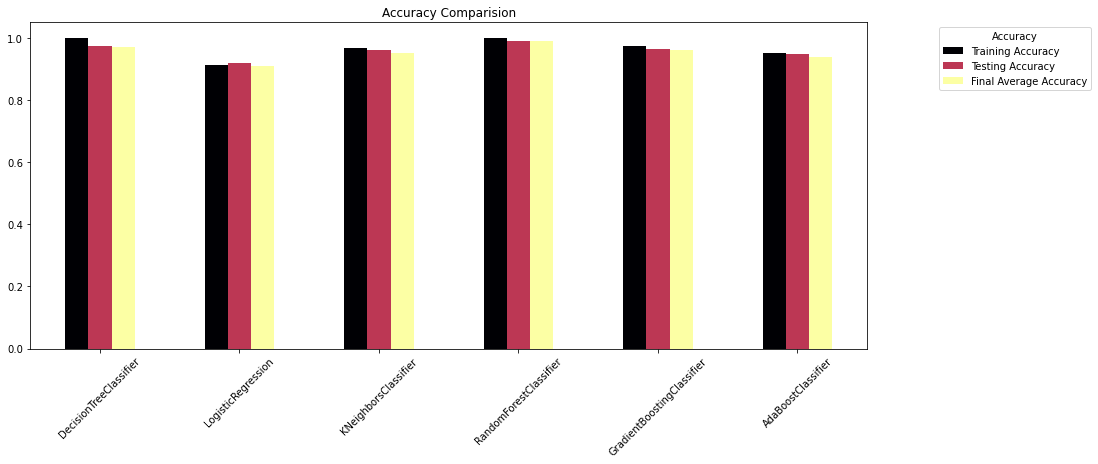

In [265]:
dfcomp[['Training Accuracy','Testing Accuracy','Final Average Accuracy']].plot(kind='bar',figsize=(15,6),title='Accuracy Comparision',colormap='inferno')
plt.xticks(rotation=45)
plt.legend(title = 'Accuracy',bbox_to_anchor=(1.08, 1), loc='upper left')
plt.show()

###### Hyperparameter Tuning

In [80]:
#forAda Boost

In [266]:
n_estimators=[2,4,6,8,10,12]
learning_rate=[1.5,3.4,5.6,9.2,10.2]
random_state=[1,5,10, 100,200,500]
algorithm=['SAMME','SAMME.R']
param_distributions = dict(n_estimators=n_estimators,
                           learning_rate=learning_rate,
                           random_state=random_state,
                           algorithm=algorithm)

random = RandomizedSearchCV(estimator=AdaBoostClassifier(),
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Score:  0.9643943235989283
Best Params:  {'random_state': 1, 'n_estimators': 12, 'learning_rate': 1.5, 'algorithm': 'SAMME.R'}


###### Final Model

*Choosing the Ada Boost as Final Model*
<br>*Ada Boost Test Accuray and Train Accuracy are approx equal*<br>
*and its final Accuracy is equal to test and train Accuracy*
<br>*final Accuracy doesn't reduce from test and train accuracy like other models*
<br>*Best Score after Hyperparameter tuning is also high*

###### Retraining the Model

In [ ]:
#Full Dataset

In [270]:
y_train=df[['Churn']]
X_train=df.drop(['Churn'],axis=1)

print("y_train :",y_train.shape)
print("X_train :",X_train.shape)

y_train : (7043, 1)
X_train : (7043, 20)


In [271]:
PScaler=StandardScaler()
PScalerFit=PScaler.fit(X_train)
x_train=PScalerFit.transform(X_train)
print("x_train :",x_train.shape)
print("y_train :",y_train.shape)


x_train : (7043, 20)
y_train : (7043, 1)


In [272]:
clf =AdaBoostClassifier(random_state=1,n_estimators=12,learning_rate=1.5,algorithm='SAMME.R')
finalRF=clf.fit(x_train,y_train)
print("Accuracy :", finalRF.score(x_train, y_train))

paccval=cross_val_score(finalRF, x_train , y_train, cv=5, scoring='f1_weighted')
print('\n\nCross Validation')
print('Accuracy values:',paccval)

print('\nFinal Average Accuracy of the model:', round(paccval.mean(),2))

Accuracy : 0.7942638080363481


Cross Validation
Accuracy values: [0.7836932  0.78459485 0.7681484  0.76784894 0.78285783]

Final Average Accuracy of the model: 0.78


###### Model Saving

In [280]:
import pickle
filename='ChurnPred.pk1'
pickle.dump(model,open(filename,'wb'))
print("Model Saved")

Model Saved
